In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from astropy import units as u
import numpy as np

import time
import sys
sys.path.insert(0, '../../')
import setigen as stg
import blimpy as bl
import os
import os.path
from blimpy import Waterfall

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
frame = stg.Frame(fil='../../sarahs/Voyager1.single_coarse.fine_res.h5')

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/blimpy/file_wrapper.py:322: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.h5 = h5py.File(self.filename)


In [12]:
frame = stg.Frame(fil='../../sarahs/test.fil')

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/blimpy/file_wrapper.py:322: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.h5 = h5py.File(self.filename)


Loaded in 1.8335649967193604 seconds
signal 1 in 0.06848597526550293 seconds
signal 2 in 0.043498992919921875 seconds
signal 3 in 0.04109978675842285 seconds
signal 4 in 0.04107403755187988 seconds
signal 5 in 0.04194903373718262 seconds
signal 6 in 0.04158806800842285 seconds
signal 7 in 0.04028606414794922 seconds
signal 8 in 0.042301177978515625 seconds
signal 9 in 0.04091286659240723 seconds


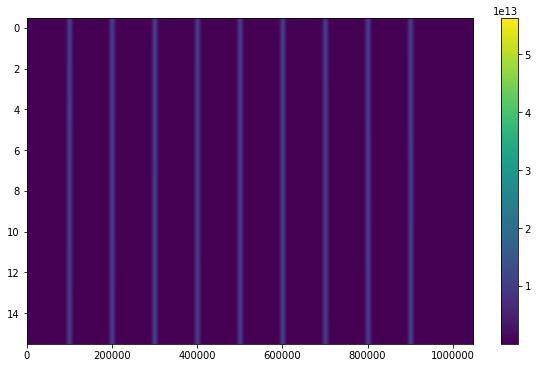

Finished in 2.600624 seconds


In [56]:
start = time.time()

data_file = '../../sarahs/Voyager1.single_coarse.fine_res.h5'
input_file = '../../sarahs/signal_test.csv'
output_file = '../../sarahs/test.fil'


fchans = 1000000
tchans = 16
df = 2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fch1 = 6095.214842353016*u.MHz

# frame = stg.Frame(fchans, tchans, df, dt, fch1)

# obs = Waterfall(data_file)
frame = stg.Frame(fil=data_file)

test_file = np.genfromtxt(input_file, delimiter=',')

print(f'Loaded in {time.time() - start} seconds')
then = time.time()

for i in range(1, test_file.shape[0]):
    
    fre = int(test_file[i][0])
    drift = test_file[i][1]
    width = int(test_file[i][3])
    
    signal = frame.add_constant_signal(f_start=frame.fs[fre],
                                   drift_rate=drift*u.Hz/u.s, 
                                   level=10**13,
                                   width=3*width*u.Hz, 
                                   f_profile_type='gaussian')

    print(f'signal {i} in {time.time() - then} seconds')
    then = time.time()

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

# fig.savefig("basic_signal.png", bbox_inches='tight')


# frame.save_fil(output_file)

print('Finished in %f seconds' % (time.time() - start))

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/blimpy/file_wrapper.py:322: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.h5 = h5py.File(self.filename)


Loaded in 1.8484599590301514 seconds
signal 1 in 0.03293800354003906 seconds
signal 2 in 0.018447160720825195 seconds
signal 3 in 0.019913911819458008 seconds
signal 4 in 0.019747018814086914 seconds
signal 5 in 0.019481182098388672 seconds
signal 6 in 0.018713951110839844 seconds
signal 7 in 0.020318031311035156 seconds
signal 8 in 0.020359039306640625 seconds
signal 9 in 0.021207809448242188 seconds


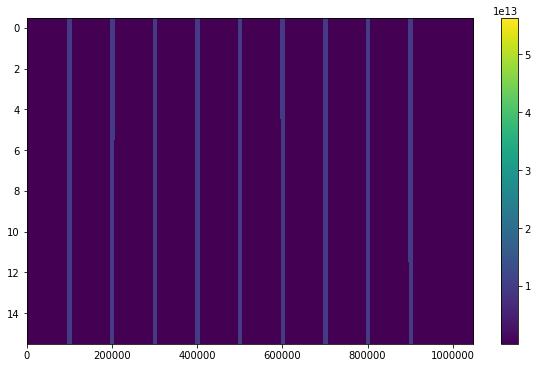

Finished in 2.424116 seconds


In [57]:
start = time.time()

data_file = '../../sarahs/Voyager1.single_coarse.fine_res.h5'
input_file = '../../sarahs/signal_test.csv'
output_file = '../../sarahs/test.fil'


fchans = 1000000
tchans = 16
df = 2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fch1 = 6095.214842353016*u.MHz

# frame = stg.Frame(fchans, tchans, df, dt, fch1)

# obs = Waterfall(data_file)
frame = stg.Frame(fil=data_file)

test_file = np.genfromtxt(input_file, delimiter=',')

print(f'Loaded in {time.time() - start} seconds')
then = time.time()

for i in range(1, test_file.shape[0]):
    
    fre = int(test_file[i][0])
    drift = test_file[i][1]
    width = int(test_file[i][3])
    
    signal = frame.add_constant_signal(f_start=frame.fs[fre],
                                   drift_rate=drift*u.Hz/u.s, 
                                   level=10**13,
                                   width=3*width*u.Hz, 
                                   f_profile_type='box')

    print(f'signal {i} in {time.time() - then} seconds')
    then = time.time()

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

# fig.savefig("basic_signal.png", bbox_inches='tight')


# frame.save_fil(output_file)

print('Finished in %f seconds' % (time.time() - start))

Loaded in 0.5603971481323242 seconds
Noise in 0.7960240840911865 seconds
signal 1 in 0.047753095626831055 seconds
signal 2 in 0.01719069480895996 seconds
signal 3 in 0.01795482635498047 seconds
signal 4 in 0.017277002334594727 seconds
signal 5 in 0.01748204231262207 seconds
signal 6 in 0.017040014266967773 seconds
signal 7 in 0.01780390739440918 seconds
signal 8 in 0.017096996307373047 seconds
signal 9 in 0.0175631046295166 seconds


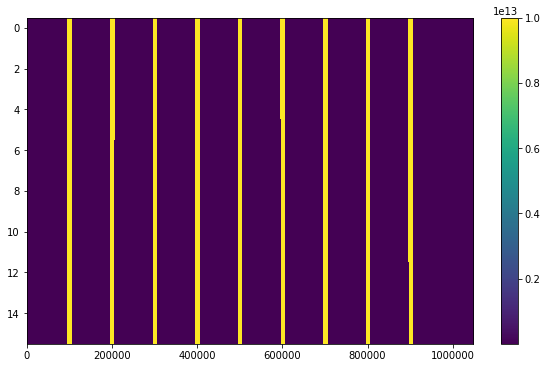

Finished in 2.256086 seconds


In [75]:
start = time.time()

data_file = '../../sarahs/Voyager1.single_coarse.fine_res.h5'
input_file = '../../sarahs/signal_test.csv'
output_file = '../../sarahs/test.fil'

fchans = 1048576
tchans = 16
df = 2.7939677238464355*u.Hz
dt = 18.25361108*u.s
fch1 = 6095.214842353016*u.MHz

frame = stg.Frame(fchans, tchans, df, dt, fch1)

# obs = Waterfall(data_file)
# frame = stg.Frame(fil=data_file)

test_file = np.genfromtxt(input_file, delimiter=',')

print(f'Loaded in {time.time() - start} seconds')
then = time.time()

frame.add_noise_from_obs()
print(f'Noise in {time.time() - then} seconds')
then = time.time()

# frame.add_noise_from_obs()
# print(f'Noise in {time.time() - then} seconds')
# then = time.time()

# frame.add_noise_from_obs()
# print(f'Noise in {time.time() - then} seconds')
# then = time.time()

# frame.add_noise_from_obs()
# print(f'Noise in {time.time() - then} seconds')
# then = time.time()

# frame.add_noise_from_obs()
# print(f'Noise in {time.time() - then} seconds')
# then = time.time()

for i in range(1, test_file.shape[0]):
    
    fre = int(test_file[i][0])
    drift = test_file[i][1]
    width = int(test_file[i][3])
    
    signal = frame.add_constant_signal(f_start=frame.fs[fre],
                                   drift_rate=drift*u.Hz/u.s, 
                                   level=10**13,
                                   width=3*width*u.Hz, 
                                   f_profile_type='box')

    print(f'signal {i} in {time.time() - then} seconds')
    then = time.time()

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

# fig.savefig("basic_signal.png", bbox_inches='tight')


# frame.save_fil(output_file)

print('Finished in %f seconds' % (time.time() - start))

In [79]:
a = time.time()
frame._update_noise_frame_stats()
time.time() - a

1.5931336879730225

In [29]:
a = time.time()
np.mean(frame.get_data())
time.time() - a

0.00644993782043457

In [30]:
0.0064*10

0.064

In [32]:
frame.data.shape

(16, 1048576)

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/blimpy/file_wrapper.py:322: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.h5 = h5py.File(self.filename)


Loaded in 1.6993179321289062 seconds
signal 1 in 1.067915916442871 seconds
signal 2 in 1.0816760063171387 seconds
signal 3 in 1.0883960723876953 seconds
signal 4 in 1.104055643081665 seconds
signal 5 in 1.0928261280059814 seconds
signal 6 in 1.0966641902923584 seconds
signal 7 in 1.0873639583587646 seconds
signal 8 in 1.0757339000701904 seconds
signal 9 in 1.0703301429748535 seconds


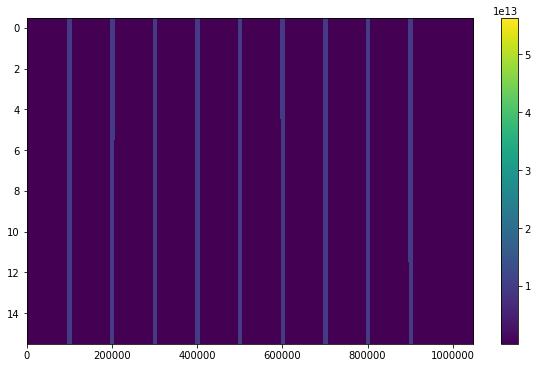

Finished in 11.837796 seconds


In [80]:
start = time.time()

frame = stg.Frame(fil=data_file)

test_file = np.genfromtxt(input_file, delimiter=',')


print(f'Loaded in {time.time() - start} seconds')
then = time.time()

for i in range(1, test_file.shape[0]):
    
    fre = int(test_file[i][0])
    drift = test_file[i][1]
    width = int(test_file[i][3])

    signal = frame.add_signal(stg.constant_path(f_start=frame.fs[fre],
                                       drift_rate=drift*u.Hz/u.s), 
                     stg.constant_t_profile(level=10**13),
                     stg.box_f_profile(width=3*width*u.Hz), 
                     stg.constant_bp_profile(level=1))

    print(f'signal {i} in {time.time() - then} seconds')
    then = time.time()
    

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

print('Finished in %f seconds' % (time.time() - start))

In [81]:
frame.get_info()

{'fil': Filterbank data: ../../sarahs/Voyager1.single_coarse.fine_res.h5,
 'header': {b'DIMENSION_LABELS': array([b'frequency', b'feed_id', b'time'], dtype=object),
  b'az_start': 0.0,
  b'data_type': 1,
  b'fch1': 8421.386717353016,
  b'foff': -2.7939677238464355e-06,
  b'ibeam': 1,
  b'machine_id': 20,
  b'nbeams': 1,
  b'nbits': 32,
  b'nchans': 1048576,
  b'nifs': 1,
  b'rawdatafile': b'guppi_57650_67573_Voyager1_0002.0000.raw',
  b'source_name': b'Voyager1',
  b'src_dej': <Angle 12.183 deg>,
  b'src_raj': <Angle 17.16777333 hourangle>,
  b'telescope_id': 6,
  b'tsamp': 18.253611008,
  b'tstart': 57650.78209490741,
  b'za_start': 0.0},
 'fchans': 1048576,
 'df': 2.7939677238464355,
 'fch1': 8421386717.353016,
 'data': array([[5.1364244e+09, 4.8248212e+09, 5.5999278e+09, ..., 5.2598994e+09,
         5.0594243e+09, 4.7153664e+09],
        [5.4136443e+09, 6.1820396e+09, 5.6150144e+09, ..., 6.0981827e+09,
         5.7968077e+09, 4.0829606e+09],
        [4.8860759e+09, 6.3778324e+09, 5.

In [37]:
dir(stg.stats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'compute_frame_stats',
 'exclude_and_flatten',
 'get_mean',
 'get_min',
 'get_std',
 'np']

In [47]:
a = time.time()
stg.stats.compute_frame_stats(frame.get_data())
time.time() - a

1.7095322608947754

In [74]:
a = time.time()
frame._update_noise_frame_stats()
time.time() - a

1.29575514793396

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/blimpy/file_wrapper.py:322: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.h5 = h5py.File(self.filename)


Loaded in 1.6945228576660156 seconds
signal 1 in 1.156505823135376 seconds
signal 2 in 1.074950933456421 seconds
signal 3 in 1.0614242553710938 seconds
signal 4 in 1.0903160572052002 seconds
signal 5 in 1.0706770420074463 seconds
signal 6 in 1.0252530574798584 seconds
signal 7 in 1.0847702026367188 seconds
signal 8 in 1.0333588123321533 seconds
signal 9 in 1.0778040885925293 seconds


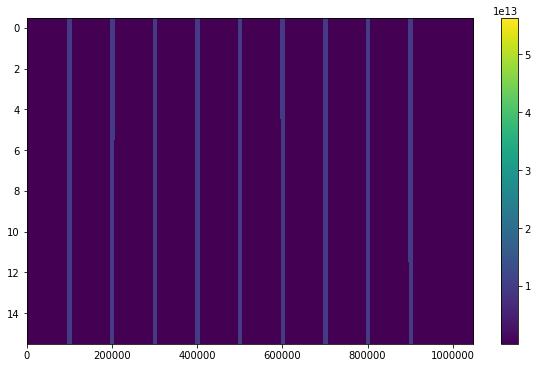

Finished in 11.707459 seconds


In [85]:
start = time.time()

frame = stg.Frame(fil=data_file)

test_file = np.genfromtxt(input_file, delimiter=',')


print(f'Loaded in {time.time() - start} seconds')
then = time.time()

for i in range(1, test_file.shape[0]):
    
    fre = int(test_file[i][0])
    drift = test_file[i][1]
    width = int(test_file[i][3])

    signal = frame.add_signal(stg.constant_path(f_start=frame.fs[fre],
                                       drift_rate=drift*u.Hz/u.s), 
                     stg.constant_t_profile(level=10**13),
                     stg.box_f_profile(width=3*width*u.Hz), 
                     stg.constant_bp_profile(level=1))

    print(f'signal {i} in {time.time() - then} seconds')
    then = time.time()
    

fig = plt.figure(figsize=(10, 6))
plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

print('Finished in %f seconds' % (time.time() - start))